<a href="https://colab.research.google.com/github/aryelmedeiros/data_science/blob/main/Netflix_TV_and_Films.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Explorando o Dataset

In [43]:
df = pd.read_csv('netflix_list.csv')
df.head()

,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
0,tt4052886,Lucifer,1,15,2016.0,NaN,93.0,42,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,"Lucifer Morningstar, bored from his sulking li...",8.1,250884.0,"Crime,Drama,Fantasy",0,"['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...",https://m.media-amazon.com/images/M/MV5BNzY1Yj...
1,tt0993840,Army of the Dead,2,18,2021.0,NaN,NaN,148,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...","With the abandoned, walled city of Las Vegas o...",5.8,110780.0,"Action,Crime,Horror",0,"['Dave Bautista', 'Ella Purnell', 'Ana de la R...",https://m.media-amazon.com/images/M/MV5BNGY0Nz...
2,tt7255502,The Kominsky Method,3,18,2018.0,2021.0,22.0,30,tvSeries,United States,English,"An aging actor, who long ago enjoyed a brush w...",Michael Douglas plays an actor who made it big...,8.2,28795.0,"Comedy,Drama",0,"['Michael Douglas', 'Sarah Baker', 'Graham Rog...",https://m.media-amazon.com/images/M/MV5BMzA0YT...
3,tt0108778,Friends,4,13+,1994.0,2004.0,235.0,22,tvSeries,United States,English,Follows the personal and professional lives of...,"Ross Geller, Rachel Green, Monica Geller, Joey...",8.9,861843.0,"Comedy,Romance",0,"['Jennifer Aniston', 'Courteney Cox', 'Lisa Ku...",https://m.media-amazon.com/images/M/MV5BNDVkYj...
4,tt9251798,Ragnarok,5,18,2020.0,NaN,12.0,45,tvSeries,Norway,Norwegian,A small Norwegian town experiencing warm winte...,In the small fictional town of Edda coming of ...,7.5,26606.0,"Action,Drama,Fantasy",0,"['David Stakston', 'Jonas Strand Gravli', 'Her...",https://m.media-amazon.com/images/M/MV5BODM3NT...


In [7]:
df.shape

(7008, 19)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        7008 non-null   object 
 1   title          7008 non-null   object 
 2   popular_rank   7008 non-null   object 
 3   certificate    2409 non-null   object 
 4   startYear      6493 non-null   float64
 5   endYear        1126 non-null   float64
 6   episodes       2304 non-null   float64
 7   runtime        7006 non-null   object 
 8   type           7006 non-null   object 
 9   orign_country  7008 non-null   object 
 10  language       7008 non-null   object 
 11  plot           6609 non-null   object 
 12  summary        7008 non-null   object 
 13  rating         6000 non-null   float64
 14  numVotes       6000 non-null   float64
 15  genres         7006 non-null   object 
 16  isAdult        7008 non-null   int64  
 17  cast           7008 non-null   object 
 18  image_ur

In [9]:
duplicates = df.duplicated()

df[duplicates]

,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url


In [10]:
df.isnull().sum()

imdb_id             0
title               0
popular_rank        0
certificate      4599
startYear         515
endYear          5882
episodes         4704
runtime             2
type                2
orign_country       0
language            0
plot              399
summary             0
rating           1008
numVotes         1008
genres              2
isAdult             0
cast                0
image_url           0
dtype: int64

###Limpeza dos dados

In [50]:
data = pd.read_csv('netflix_list.csv')
data.loc[(data['type'].isin(['tvSeries', 'tvEpisode', 'tvSpecial', 'tvMiniSeries'])), 'endYear'] = data['endYear'].fillna('Still Showing')
data.loc[(data['type'].isin(['movie', 'short', 'tvMovie', 'video', 'videoGame', 'tvShort'])), 'endYear'] = data['endYear'].fillna(data['startYear'])
data.loc[(data['type'].isin(['movie', 'short', 'tvMovie', 'video', 'videoGame', 'tvShort'])), 'episodes'] = data['episodes'].fillna(1)
data.loc[(data['type'].isin(['movie', 'short', 'tvMovie', 'video', 'videoGame', 'tvShort'])), 'type'] = 'movie'
data.loc[(data['type'].isin(['tvSeries', 'tvEpisode', 'tvSpecial', 'tvMiniSeries'])), 'type'] = 'serie'
data.loc[(data['genres'].isin(['\\N', 'nan'])), 'genres'] = 'Unknow'
data = data.drop('certificate', axis=1)
data = data.drop('image_url', axis=1)
data = data.drop('isAdult', axis=1)


## Matriz de Correlação das Variaveis Númericas

<ipython-input-51-b699050ce883>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

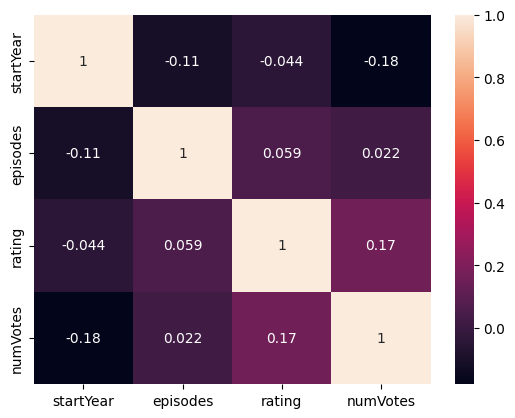

In [51]:
sns.heatmap(data.corr(), annot=True)

## Países que mais produzem conteúdos


<Axes: >

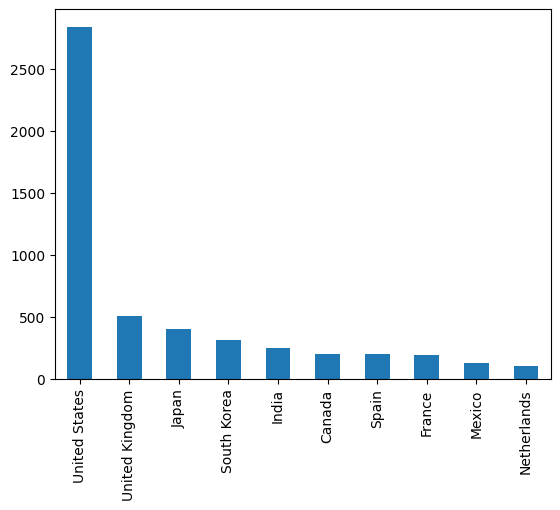

In [54]:
cleaning = data[data['orign_country']!= '-']
popular_countries = cleaning['orign_country'].value_counts().head(10)
popular_countries.plot(kind='bar')

## Gêneros mais bem avaliados


In [55]:
data[['genres']] = data[['genres']].astype(str)
for i, row in data.iterrows():
    ifor_val = data.at[i, "genres"].split(",")[0]
    data.at[i,'genres'] = ifor_val

data.genres.unique()

array(['Crime', 'Action', 'Comedy', 'Drama', 'Adventure', 'Animation',
       'Biography', 'Horror', 'Mystery', 'Musical', 'Family', 'Thriller',
       'Game-Show', 'Reality-TV', 'Documentary', 'Sci-Fi', 'Fantasy',
       'History', 'Romance', 'Sport', 'Talk-Show', 'Music', 'Film-Noir',
       'Unknow', 'Western', 'War', 'News', 'Short', 'nan'], dtype=object)

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


<Axes: xlabel='rating', ylabel='genres'>

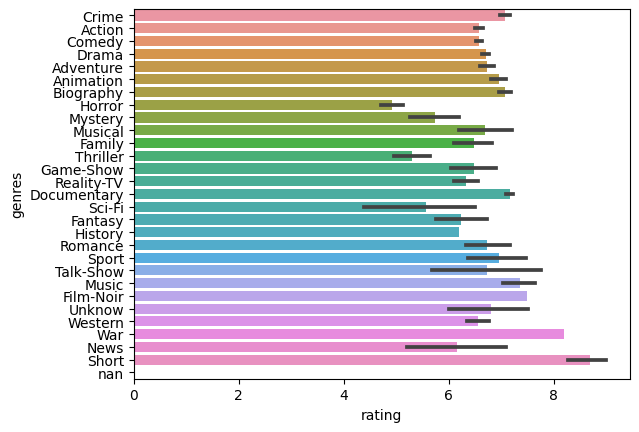

In [56]:
popular_genres = data['genres']
sns.barplot(data=data, x='rating', y=popular_genres)

## Quantidade de conteúdos em Iglês (Filmes e Séries de TV)

<Axes: xlabel='isInEnglish', ylabel='count'>

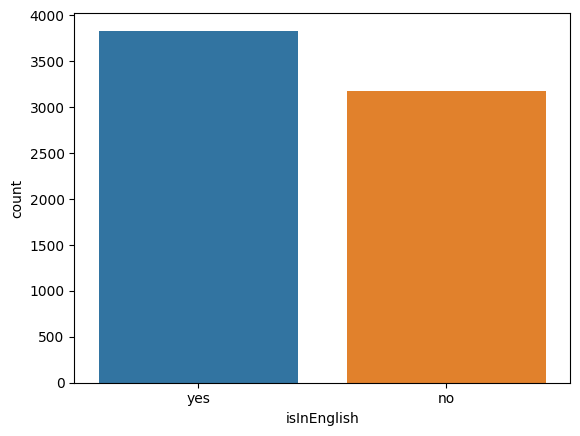

In [53]:
data['isInEnglish'] = np.where(data['language'] == 'English', 'yes', 'no')
sns.countplot(data=data, x='isInEnglish')

### Analizando pela variável Notas

<Axes: xlabel='isInEnglish', ylabel='rating'>

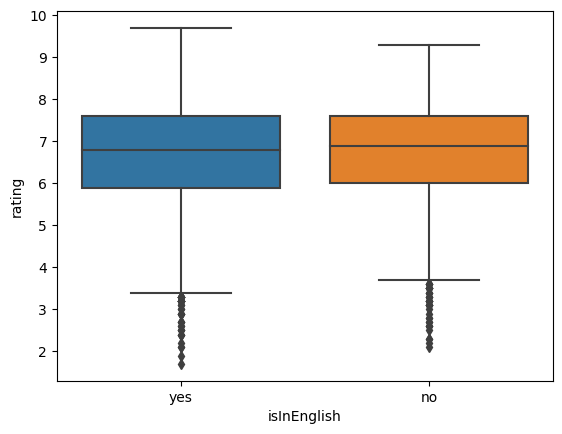

In [57]:
sns.boxplot(data=data, y="rating", x='isInEnglish')

## Quantidade de conteúdos Americanos (Filmes e Séries de TV)

<Axes: xlabel='isFromUs', ylabel='count'>

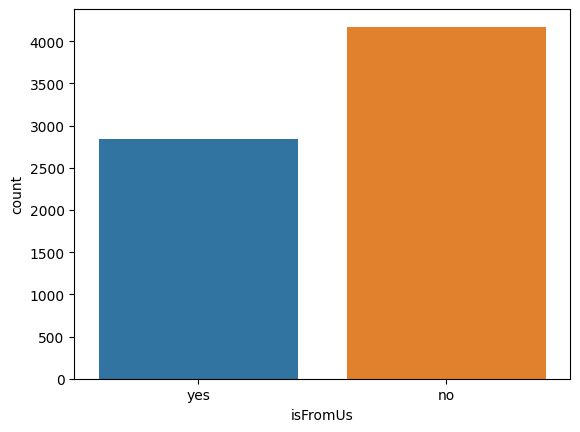

In [52]:
data['isFromUs'] = np.where(data['orign_country'] == 'United States', 'yes', 'no')
sns.countplot(data=data, x='isFromUs')

### Analizando pela variável Notas

<Axes: xlabel='isFromUs', ylabel='rating'>

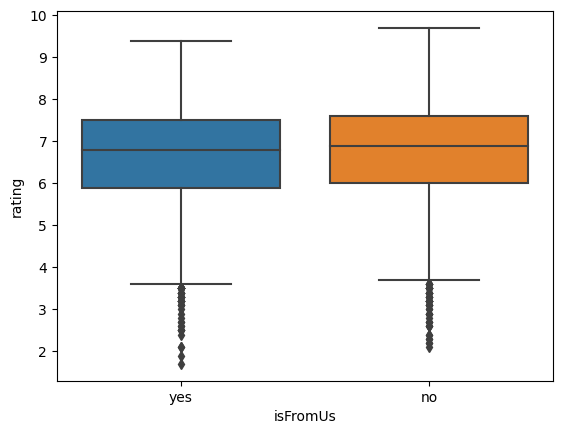

In [58]:
sns.boxplot(data=data, y="rating", x='isFromUs')

# Filmes em inglês tem menor audiência que filmes em outros idiomas?


## Analizando pela varivel Num. de Votos

In [5]:
no_votes = df['numVotes'].isnull()
df_filtered = df[~no_votes].copy()

#df_filtered.head()

In [6]:
df_filtered = df_filtered[df_filtered['numVotes'] < 20000]


In [8]:
non_english_films = df_filtered[(df_filtered['type'].isin(['tvSeries', 'tvEpisode', 'tvSpecial', 'tvMiniSeries'])) & (df_filtered['language'] != 'English')]['numVotes']
english_films = df_filtered[(df_filtered['type'].isin(['tvSeries', 'tvEpisode', 'tvSpecial', 'tvMiniSeries'])) & (df_filtered['language'] == 'English')]['numVotes']
english_series = df_filtered[(df_filtered['type'].isin(['movie', 'short', 'tvMovie', 'video', 'videoGame', 'tvShrt'])) &(df_filtered['language'] == 'English')]['numVotes']
non_english_series = df_filtered[(df_filtered['type'].isin(['movie', 'short', 'tvMovie', 'video', 'videoGame', 'tvShrt'])) &(df_filtered['language'] != 'English')]['numVotes']

print("Filmes em Outros Idiomas",non_english_films.size)
print("Filmes em Inglês",english_films.size)
print("Séries de TV em Outros Idiomas",non_english_series.size)
print("Séries de TV em Outros Idiomas", english_series.size)

Filmes em Outros Idiomas 1394
Filmes em Inglês 1441
Séries de TV em Outros Idiomas 1079
Séries de TV em Outros Idiomas 1260


## Teste T para a hipotese: Filmes em inglês tem menor audiência que filmes em outros idiomas


In [9]:
t_statistic, p_value = stats.ttest_ind(non_english_films, english_films, equal_var=False)
alpha = 0.05  # Nível de significancia

if p_value < alpha:
    print("Filmes com idiomas diferentes do inglês têm uma audiência significativamente menor.")
else:
    print("Não há diferença significativa na audiência entre filmes com idiomas diferentes do inglês e filmes em inglês.")

Filmes com idiomas diferentes do inglês têm uma audiência significativamente menor.


## Repetindo o test T para o conjunto das Séries de TV

In [125]:
t_statistic, p_value = stats.ttest_ind(non_english_series, english_series, equal_var=False)
alpha = 0.05  # Nível de significancia

if p_value < alpha:
    print("Séries de TV com idiomas diferentes do inglês têm uma audiência significativamente menor.")
else:
    print("Não há diferença significativa na audiência entre Séries de TV com idiomas diferentes do inglês e Séries de TV em inglês.")


Filmes com idiomas diferentes do Séries de TV têm uma audiência significativamente menor.


### Plotanto o Histograma da Frência Relativa pelo Num. de Votos

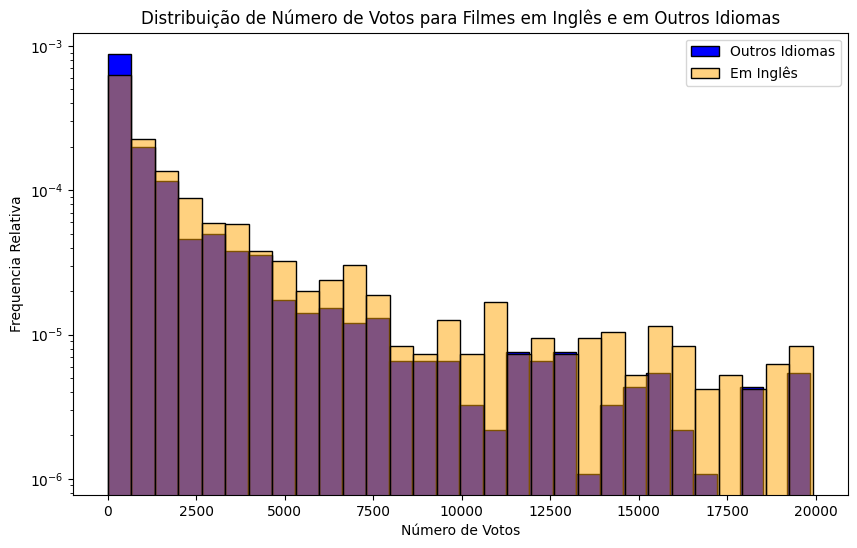

In [123]:
plt.figure(figsize=(10, 6))

# Histogramas de filmes em outros idiomas
sns.histplot(non_english_films, bins=30, label='Outros Idiomas', color='blue', alpha=1,stat = 'density')
plt.yscale('log')

# Histogramas de filmes em Inglês
sns.histplot(english_films, bins=30, label='Em Inglês', color='orange', alpha=0.5, stat = 'density')
plt.yscale('log')

plt.xlabel('Número de Votos')
plt.ylabel('Frequência Relativa')
plt.title('Distribuição de Número de Votos para Filmes em Inglês e em Outros Idiomas')
plt.legend()
plt.show()

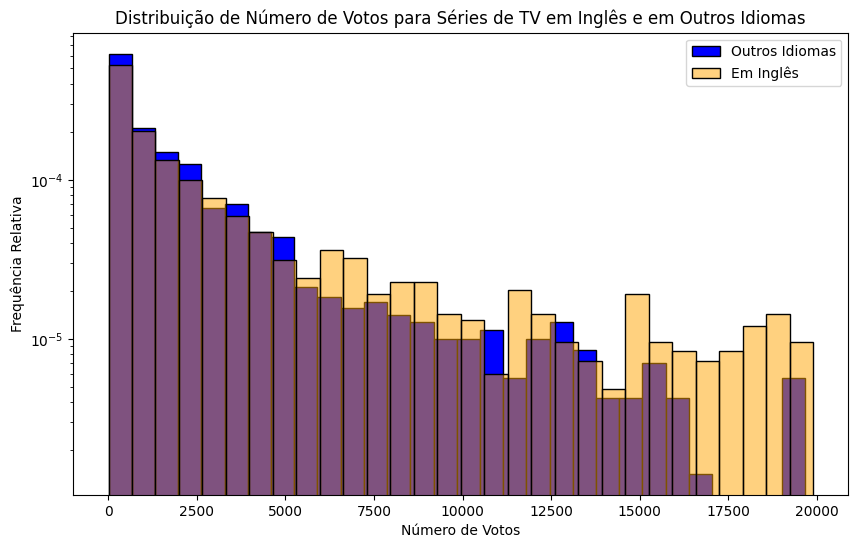

In [128]:
plt.figure(figsize=(10, 6))

# Histogramas de Séries de TV em outros idiomas
sns.histplot(non_english_series, bins=30, label='Outros Idiomas', color='blue', alpha=1,stat = 'density')
plt.yscale('log')

# Histogramas de Séries de TV em Inglês
sns.histplot(english_series, bins=30, label='Em Inglês', color='orange', alpha=0.5, stat = 'density')
plt.yscale('log')

plt.xlabel('Número de Votos')
plt.ylabel('Frequência Relativa')
plt.title('Distribuição de Número de Votos para Séries de TV em Inglês e em Outros Idiomas')
plt.legend()
plt.show()

# Filmes Não Americanos tem menor audiência que filmes em outros idiomas

## Separando os conjuntos a serem analizados

## Analizando pela varivel Num. de Votos

In [10]:
non_US_series = df_filtered[(df_filtered['type'].isin(['tvSeries', 'tvEpisode', 'tvSpecial', 'tvMiniSeries']))&(df_filtered['orign_country'] != 'United States')]['numVotes']
US_seires = df_filtered[(df_filtered['type'].isin(['tvSeries', 'tvEpisode', 'tvSpecial', 'tvMiniSeries']))&(df_filtered['orign_country'] == 'United States')]['numVotes']


non_US_films = df_filtered[(df_filtered['type'].isin(['movie', 'short', 'tvMovie', 'video', 'videoGame', 'tvShrt']))&(df_filtered['orign_country'] != 'United States')]['numVotes']
US_films = df_filtered[(df_filtered['type'].isin(['movie', 'short', 'tvMovie', 'video', 'videoGame', 'tvShrt']))&(df_filtered['orign_country'] == 'United States')]['numVotes']

print("Filmes em Não Americanos",non_US_films.size)
print("Filmes em Americanos ",US_films .size)
print("Séries de TV Não Americanos",non_US_series.size)
print("Séries de TV Não Americanos", US_seires.size)

Filmes em Não Americanos 1413
Filmes em Americanos  926
Séries de TV Não Americanos 1830
Séries de TV Não Americanos 1005


## Teste T para a hipotese: Filmes Não Americanos tem menor audiência que filmes em outros idiomas


In [11]:
t_statistic1, p_value1 = stats.ttest_ind(non_US_films, US_films, equal_var=False)
alpha = 0.05  #Nível de significancia

if p_value1 < alpha:
    print("Filmes não americanos têm uma audiência significativamente menor.")
else:
    print("Não há diferença significativa na audiência entre filmes americanos e não americanos.")

Filmes não americanos têm uma audiência significativamente menor.


## Repetindo o test T para o conjunto das Séries de TV

In [13]:
t_statistic1, p_value1 = stats.ttest_ind(non_US_series, US_seires, equal_var=False)
alpha = 0.05  # Nível de significancia

if p_value1 < alpha:
    print("Séries de TV não americanas têm uma audiência significativamente menor.")
else:
    print("Não há diferença significativa na audiência entre séries de TV americanas e não americanas.")

Séries de TV não americanas têm uma audiência significativamente menor.


### Plotanto o Histograma da Frência Relativa pelo Num. de Votos

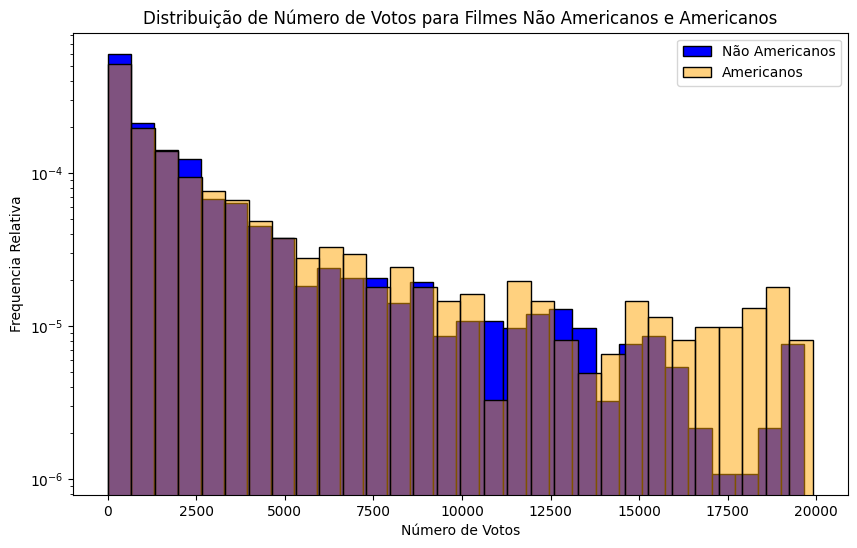

In [139]:
plt.figure(figsize=(10, 6))

# Histrograma para filmes não americanos
sns.histplot(non_US_films, bins=30, label='Não Americanos', color='blue', alpha=1,stat = 'density')
plt.yscale('log')

# Histrograma para filmes americanos
sns.histplot(US_films, bins=30, label='Americanos', color='orange', alpha=0.5, stat = 'density')
plt.yscale('log')

plt.xlabel('Número de Votos')
plt.ylabel('Frequencia Relativa')
plt.title('Distribuição de Número de Votos para Filmes Não Americanos e Americanos')
plt.legend()
plt.show()

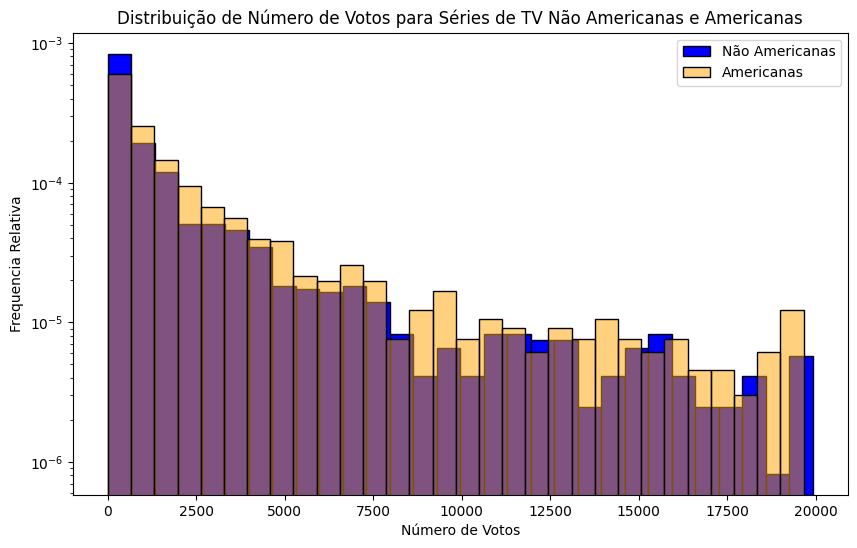

In [144]:
plt.figure(figsize=(10, 6))

# Histrograma para Séries de TV não americanos
sns.histplot(non_US_series, bins=30, label='Não Americanas', color='blue', alpha=1,stat = 'density')
plt.yscale('log')

# Histrograma para Séries de TV americanas
sns.histplot(US_seires, bins=30, label='Americanas', color='orange', alpha=0.5, stat = 'density')
plt.yscale('log')

plt.xlabel('Número de Votos')
plt.ylabel('Frequencia Relativa')
plt.title('Distribuição de Número de Votos para Séries de TV Não Americanas e Americanas')
plt.legend()
plt.show()

# Séries de TV têm notas maiores que Filmes?

### Apagando linhas com valores nulos de notas

In [14]:
no_ratings = df['rating'].isnull()
df_filtered1 = df[~no_ratings].copy()

#df_filtered1.head()

In [117]:
tv_series = df_filtered1[df_filtered1['type'].isin(['tvSeries', 'tvEpisode', 'tvSpecial', 'tvMiniSeries'])]['rating']
films = df_filtered1[df_filtered1['type'].isin(['movie', 'short', 'tvMovie', 'video', 'videoGame', 'tvShrt'])]['rating']

print("Quantidade de Filmes:",films.size)
print("Quantidade de Series:",tv_series.size)

Quantidade de Filmes: 2833
Quantidade de Series: 3162


## Teste T para a hipotese: Séries de TV tem notas maiores que Filmes


In [118]:
t_statistic2, p_value2 = stats.ttest_ind(tv_series, films, equal_var=False)
alpha = 0.05  # Nível de significancia

if p_value2 < alpha:
    print("As séries de TV têm classificações significativamente mais altas do que os filmes.")
else:
    print("Não há diferença significativa nas classificações entre séries de TV e filmes.")

As séries de TV têm classificações significativamente mais altas do que os filmes.


### Plotando Boxplot de Nota pelos tipos de contúdo

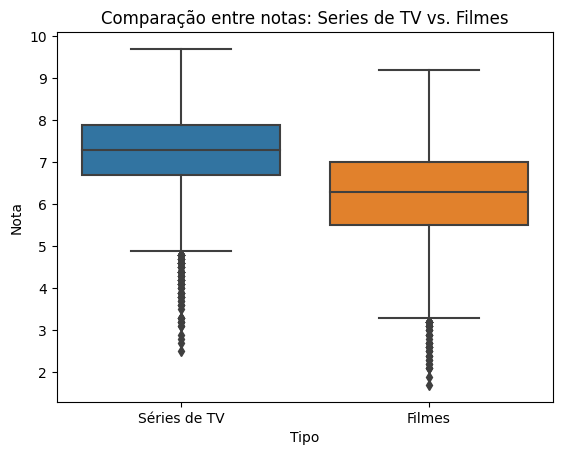

In [119]:
data = pd.DataFrame({'Séries de TV': tv_series, 'Filmes': films})
sns.boxplot(data=data)
plt.xlabel('Tipo')
plt.ylabel('Nota')
plt.title('Comparação entre notas: Series de TV vs. Filmes')
plt.show()

# É possivel predizer as notas dos filmes e séries por fatores como: classificação indicativa, tempo de duração e tipo?

In [200]:
features = ['certificate', 'runtime', 'type']
target = 'rating'

In [201]:
df.certificate.value_counts()

18           625
16           418
13           255
R            232
A            148
UA           111
7            109
U            104
PG-13         97
16+           74
18+           58
PG            56
13+           22
All           20
15+           18
Not Rated     16
15            12
12+           12
G              7
7+             6
12             3
(Banned)       3
Unrated        2
NC-17          1
Name: certificate, dtype: int64

## Ajuste do conjunto de dados

In [205]:
df.certificate.replace('PG-13', '13', inplace=True)
df.certificate.replace('18+', '18', inplace=True)
df.certificate.replace('16+', '16', inplace=True)
df.certificate.replace('15+', '15', inplace=True)
df.certificate.replace('12+', '12', inplace=True)
df.certificate.replace('13+', '13', inplace=True)
df.certificate.replace('7+', '7', inplace=True)
df.certificate.replace('NC-17', '18', inplace=True)
df.certificate.replace('G', 'All', inplace=True)
df.certificate.replace('U', 'All', inplace=True)
df.certificate.replace('UA', '13', inplace=True)
df.certificate.replace('A', '18', inplace=True)
df.certificate.replace('R', '18', inplace=True)



df.certificate.value_counts()

18           1064
16            492
13            485
All           131
7             115
PG             56
15             30
Not Rated      16
12             15
(Banned)        3
Unrated         2
Name: certificate, dtype: int64

In [206]:
df.runtime.replace('\\N', np.nan, inplace=True)
df.runtime.value_counts()

60     280
30     184
90     161
24     159
45     136
      ... 
187      1
629      1
189      1
557      1
165      1
Name: runtime, Length: 259, dtype: int64

In [187]:
print(df.shape)

(7008, 19)


In [207]:
df = df.dropna(subset=features + [target])
print(df.shape)

(2127, 19)


## Transformar as labels em valores numericos para o metodo de aprendizagem supervisionado

In [208]:
label_encoder = LabelEncoder()
for feature in ['certificate', 'type']:
    df[feature] = label_encoder.fit_transform(df[feature])

## Sepração dos conjuntos de treino e teste

In [217]:
# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Criação dos Modelos

In [210]:
# Definindo o modelo
model = LinearRegression()

# Treinando o modelo
model.fit(X_train, y_train)

LinearRegression()

In [218]:
# Create the Random Forest regressor
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor()

## Predição utilizando o modelo

In [219]:
y_pred = model.predict(X_test)

## Avaliação do Modelo

In [220]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

Mean Squared Error: 1.1175982323841613
Mean Absolute Error: 0.8028178509498731
R-squared: 0.23888024033971245


### Vizualização da aplicação do Modelo

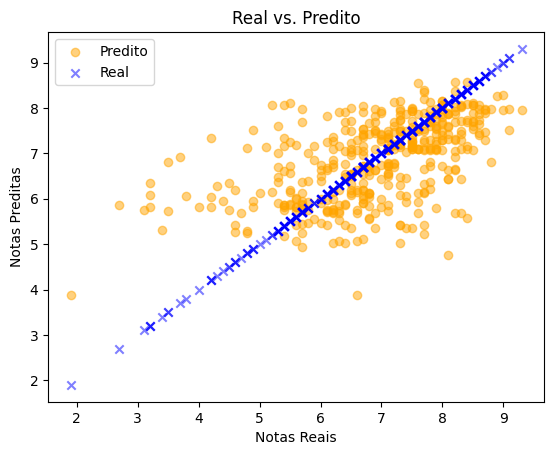

In [221]:
# Plot the actual ratings
plt.scatter(y_test, y_pred, alpha=0.5, color='orange', label='Predito', marker='o')
# Plot the predicted ratings
plt.scatter(y_test, y_test, alpha=0.5, color='blue', label='Real', marker='x')

plt.xlabel('Notas Reais')
plt.ylabel('Notas Preditas')
plt.title('Real vs. Predito')
plt.legend()
plt.show()

# É possível identificar diferentes clusters de filmes/séries com base no plot?


In [15]:
df_original = pd.read_csv("netflix_list.csv")
df_original.head(2)

,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
0,tt4052886,Lucifer,1,15,2016.0,NaN,93.0,42,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,"Lucifer Morningstar, bored from his sulking li...",8.1,250884.0,"Crime,Drama,Fantasy",0,"['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...",https://m.media-amazon.com/images/M/MV5BNzY1Yj...
1,tt0993840,Army of the Dead,2,18,2021.0,NaN,NaN,148,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...","With the abandoned, walled city of Las Vegas o...",5.8,110780.0,"Action,Crime,Horror",0,"['Dave Bautista', 'Ella Purnell', 'Ana de la R...",https://m.media-amazon.com/images/M/MV5BNGY0Nz...


In [33]:
df = df_original[["imdb_id","plot", "rating"]]
df = df.dropna()
df.reset_index(inplace=True, drop=True)
df.tail(2)

,imdb_id,plot,rating
5835,tt9817600,"The life of Michael Bentt, a champion boxer fo...",8.0
5836,tt9842922,Kate experiences the force of nature that is T...,7.3


In [17]:
!pip install tensorflow-gpu==2.8.0
import tensorflow as tf
!pip install tensorflow-io==0.25.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 25.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.1
    Uninstalling tensorboard-data-server-0.7.1:
      Successfully uninstalled tensorboard-data-server-0.7.1
  Attempting uninstall: google-auth-oauthlib
    Found existing insta

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [34]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["plot"])

In [35]:
tv = TfidfVectorizer(norm='l1', use_idf=False, smooth_idf=False, lowercase=True,
                     stop_words="english", min_df=0.005, max_df=1.0, max_features=None,
                     ngram_range=(1,1))
vectorized = pd.DataFrame(tv.fit_transform(df["plot"]).toarray(), columns=tv.get_feature_names_out())
vectorized

,000,academy,accident,accidentally,action,actor,adventure,adventures,age,agent,...,work,working,works,world,writer,wrong,year,years,york,young
0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.200,0.0,0.0,0.0
5833,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
5834,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
5835,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0


In [31]:
df["plot"]

0       Lucifer Morningstar has decided he's had enoug...
1       Following a zombie outbreak in Las Vegas, a gr...
2       An aging actor, who long ago enjoyed a brush w...
3       Follows the personal and professional lives of...
4       A small Norwegian town experiencing warm winte...
                              ...                        
7000    As the Pico Porcupines prepare for a new year ...
7002    Rosa, an ambitious and intelligent college stu...
7003    When his daughter arrives home for the holiday...
7005    The life of Michael Bentt, a champion boxer fo...
7006    Kate experiences the force of nature that is T...
Name: plot, Length: 5837, dtype: object

#É possível prever a nota do filme/série de acordo com o seu plot?


In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=200)
pca_plot = pca.fit_transform(vectorized)

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(pca_plot,df["rating"],test_size=0.1)

In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
from sklearn import metrics

X_train_p = poly.fit_transform(X_train)
X_test_p = poly.fit_transform(X_test)
X_train_p.shape
from  sklearn import linear_model
regr_lasso = linear_model.Lasso(alpha=.3)
regr_lasso.fit(X_train_p, y_train)
print('Coeff and intercept:', regr_lasso.coef_,  regr_lasso.intercept_)
print('Training Score:', regr_lasso.score(X_train_p, y_train))
print('Testing Score:', regr_lasso.score(X_test_p, y_test))
print('Training MSE: ', np.mean((regr_lasso.predict(X_train_p) - y_train)**2))
print('Testing MSE: ', np.mean((regr_lasso.predict(X_test_p) - y_test)**2))
print("Training R^2:", metrics.r2_score(regr_lasso.predict(X_train_p), y_train))
print("Testing R^2:", metrics.r2_score(regr_lasso.predict(X_test_p), y_test))

Coeff and intercept: [ 0.  0. -0. ...  0.  0.  0.] 6.697810774795355
Training Score: 0.0
Testing Score: -9.289914995092019e-05
Training MSE:  1.4673985958328852
Testing MSE:  1.4687968039256347
Training R^2: -4.650371776954045e+29
Testing R^2: -1.8619211501096358e+30


In [39]:
result = df["plot"].apply(len).mean()
result

160.53023813602877

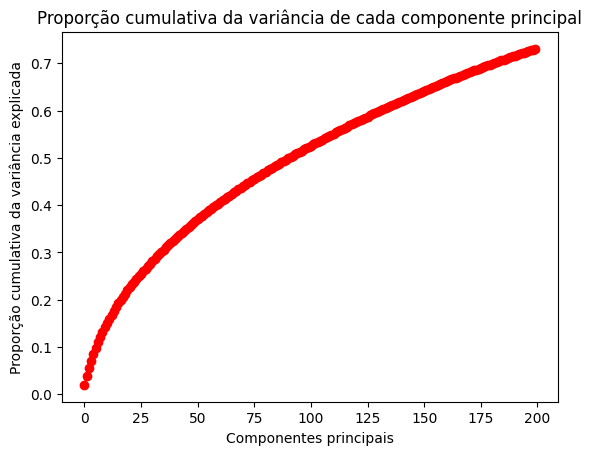

In [40]:
plt.plot(range(len(pca.explained_variance_ratio_)),
         np.cumsum(pca.explained_variance_ratio_),
         'ro-')
plt.title('Proporção cumulativa da variância de cada componente principal')
plt.xlabel('Componentes principais')
plt.ylabel('Proporção cumulativa da variância explicada')
plt.show()

In [41]:
from sklearn.cluster import DBSCAN
cdbscan = DBSCAN(eps=0.01).fit_predict(pca_plot)
import collections
counter = collections.Counter(cdbscan)
counter

Counter({-1: 5780, 0: 41, 1: 5, 2: 6, 3: 5})

In [42]:
from sklearn.cluster import OPTICS
op = OPTICS(min_samples=2).fit_predict(pca_plot)
counter = collections.Counter(op)
counter

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Counter({0: 2,
         -1: 4854,
         284: 2,
         147: 2,
         171: 5,
         61: 2,
         298: 2,
         155: 3,
         2: 2,
         294: 2,
         62: 3,
         330: 2,
         220: 2,
         368: 4,
         68: 2,
         1: 44,
         161: 2,
         119: 2,
         341: 2,
         205: 2,
         256: 2,
         125: 2,
         402: 2,
         207: 2,
         201: 4,
         339: 4,
         134: 2,
         17: 2,
         198: 2,
         18: 3,
         12: 2,
         206: 2,
         106: 2,
         225: 2,
         69: 2,
         357: 2,
         118: 2,
         36: 4,
         217: 2,
         139: 2,
         248: 3,
         329: 2,
         169: 2,
         247: 2,
         325: 2,
         32: 2,
         398: 2,
         51: 2,
         84: 4,
         13: 2,
         292: 2,
         204: 2,
         178: 2,
         378: 3,
         276: 3,
         272: 2,
         237: 2,
         184: 2,
         174: 2,
         376